In [1]:
# https://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

In [2]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

In [3]:
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

In [4]:
import numpy as np

In [5]:
x = np.random.randn(num_examples, num_inputs)
noise = .1 * np.random.randn(num_examples)
y = real_fn(x) + noise

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x.shape, y.shape

((10000, 2), (10000,))

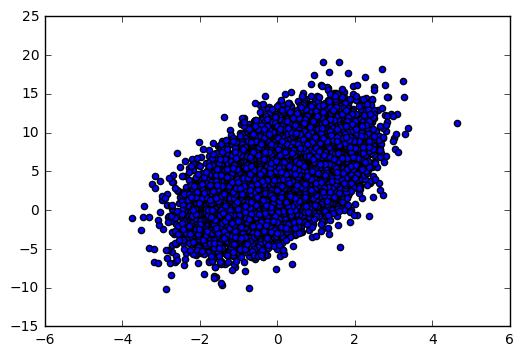

In [8]:
plt.scatter(x[:, 0], y)

In [9]:
w = np.random.randn(num_inputs, num_outputs)
b = np.random.randn(num_outputs)

In [10]:
def linear_regression(x, w, b):
    return np.dot(x, np.squeeze(w)) + b

In [11]:
def square_loss(yhat, y):
    return np.mean((yhat - y) ** 2)

In [12]:
def linear_regression_grad(w, b, x, y):
    # obj func sum(G(w, b)) / N
    #   where G(w, b) = [(wx + b) - y].^2
    # DG(w, b) / dw
    #   = 2 * (wx + b - y) * D(wx + b - y) / dw
    #   = 2 * (wx + b - y) * x
    # DG(w, b) / db
    #   = 2 * (wx + b - y) * D(wx + b - y) / db
    #   = 2 * (wx + b - y)
    z = 2 * (np.dot(x, np.squeeze(w)) + b - y)
    #print([z.shape, x.shape, np.squeeze(w).shape])
    return np.mean(z[:, np.newaxis] * x, axis=0), np.mean(z)

In [13]:
def sgd_update(w, b, x, y, rate):
    grad_w, grad_b = linear_regression_grad(w, b, x, y)
#     print(grad_w)
#     print(grad_b)
    w[:] = w - rate * grad_w[:, np.newaxis]
    b[:] = b - rate * grad_b
    return w, b

In [14]:
z = np.array(list(zip(x, y)))
np.random.shuffle(z)
z.size, z[0]

(20000,
 array([array([-0.05832477, -2.06054881]), 11.162106435130765], dtype=object))

In [15]:
batch_size = 4
num_batches = num_examples / batch_size
batches = np.array_split(z, num_batches)
num_batches, batches[0]

(2500.0, array([[array([-0.05832477, -2.06054881]), 11.162106435130765],
        [array([-1.08319407,  1.25941655]), -2.4107342559854574],
        [array([-1.2343993 ,  1.26208578]), -2.4450271943346715],
        [array([ 0.10472805,  0.71668518]), 2.1520949804215785]], dtype=object))

In [16]:
bx, by = zip(*batches[0])
bx, by = np.array(bx), np.array(by)

In [17]:
bx, by, w, b

(array([[-0.05832477, -2.06054881],
        [-1.08319407,  1.25941655],
        [-1.2343993 ,  1.26208578],
        [ 0.10472805,  0.71668518]]),
 array([ 11.16210644,  -2.41073426,  -2.44502719,   2.15209498]),
 array([[ 0.61069861],
        [-0.72013903]]),
 array([-0.09516716]))

In [18]:
#linear_regression_grad(w, b, bx, by)
# z = 2 * (np.dot(x, np.squeeze(w)) + b - y)
# np.mean(z[:, np.newaxis] * x), np.mean(z)
z = np.dot(bx, np.squeeze(w)) + b - by

In [19]:
epochs = 10
learning_rate = .0001

In [20]:
for e in range(epochs):
    cumulative_loss = 0
    for batch in batches:
        bx, by = zip(*batch)
        bx, by = np.array(bx), np.array(by)
        yhat = linear_regression(bx, w, b)
        loss = square_loss(yhat, by)
        cumulative_loss += loss
        sgd_update(w, b, bx, by, learning_rate)
    print(cumulative_loss / num_batches)

17.4512234199
6.42089774131
2.36713727347
0.876910505784
0.328931396284
0.127381508345
0.0532347395746
0.0259532266313
0.0159146449382
0.012221114816


In [21]:
w

array([[ 1.99429276],
       [-3.38175928]])

In [22]:
b

array([ 4.17214862])

In [23]:
bx, by = zip(*batches[0])

In [24]:
bx

(array([-0.05832477, -2.06054881]),
 array([-1.08319407,  1.25941655]),
 array([-1.2343993 ,  1.26208578]),
 array([ 0.10472805,  0.71668518]))

In [25]:
by

(11.162106435130765,
 -2.4107342559854574,
 -2.4450271943346715,
 2.1520949804215785)

In [26]:
batches[0].shape

(4, 2)

In [27]:
w

array([[ 1.99429276],
       [-3.38175928]])

In [28]:
b

array([ 4.17214862])

In [29]:
np.array([1, 2, 3]).shape

(3,)

In [30]:
a = np.ones((4, 2, 1)) * 2
b = np.ones((2, 1)) * .5

In [31]:
a

array([[[ 2.],
        [ 2.]],

       [[ 2.],
        [ 2.]],

       [[ 2.],
        [ 2.]],

       [[ 2.],
        [ 2.]]])

In [32]:
b

array([[ 0.5],
       [ 0.5]])

In [33]:
np.dot(a, b)

ValueError: shapes (4,2,1) and (2,1) not aligned: 1 (dim 2) != 2 (dim 0)